<div class="alert alert-success">
     <b>  </b>
   
## LAB REPORT Classification. Important Information:

* This lab report must be completed **individually**.
* Please upload your completed report to Atenea.
* You have one week to complete and submit the report.
</div>



Dataset can be found in [Kaggle](#https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset) 

The target variable **Diabetes_binary** has 2 classes. 
* 0 is for no diabetes, 
* 1 is for prediabetes or diabetes. 



### What represents each column?

**(LABEL) Diabetes_binary:** Description: Indicates whether an individual has diabetes (1) or not (0). This is likely the target or outcome variable of the dataset.


**HighBP:** Indicates if the person has high blood pressure (1) or not (0).


**HighChol:** Indicates if the individual has high cholesterol levels (1) or not (0).

**CholCheck:** Whether the individual has had their cholesterol checked (1) in the last 5 years or not (0).

**BMI:** The individual’s Body Mass Index (BMI), a measure of body fat based on height and weight.

**Smoker:** Indicates whether the individual is a smoker (1) or not (0).


**Stroke:** Indicates if the individual has had a stroke (1) or not (0).


**HeartDiseaseorAttack:** Whether the individual has had coronary heart disease or myocardial infarction (1) or not (0).

**PhysActivity:** Indicates if the individual has engaged in physical activity or exercise in the last 30 days - not including job (1) or not (0).


**Fruits:** Indicates whether the individual consumes 1 fruit or more daily (1) or not (0).


**Veggies:** Indicates whether the individual consumes 1 vegetable or more daily (1) or not (0).

**HeavyAlcoholCons:** Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) (1) or not (0)

**AnyHealthcare:** Indicates whether the person has access to any form of healthcare coverage (1) or not (0).

**NoDocbcCost:** Whether the person could not visit a doctor in the past year due to cost (1) or not (0).

**GenHlth:** Self-reported general health status, where lower values (1) indicate better health (e.g., excellent) and higher values (5) indicate worse health (e.g., poor).

**MentHlth:** Number of days in the past 30 days that the individual experienced poor mental health (stress, depression, and problems with emotions).

**PhysHlth:** Number of days in the past 30 days that the individual experienced poor physical health (physical illness and injury).

**DiffWalk:** Indicates whether the individual has difficulty walking or climbing stairs (1) or not (0).


**Sex:** Gender of the individual, 0 = female; 1 = male.

**Age:** Represents age group categories. 13-level age category. 
* 1: 18-24 years old
* 2: 25-29 years old
* ...
* 13: 80 years or older

**Education:** Represents the highest level of education attained. 
* 1: Never attended school
* 2: Elementary school
* ...
* 6: College graduate.

**Income:** Represents income categories. Scale 1-8

* 1: Less than 10 000 
* 2: 10 000 to 14 999
* ...
* 8: 75 000 or more.

# Import libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Load dataset

In [4]:
link = 'https://raw.githubusercontent.com/sbarja/course2425_datascience4energysystems/refs/heads/main/Data/S4_diabetes_desequilibrio_clases.csv'

dataset = pd.read_csv(link)

# **1. Understanding the data**

It is necessary to visualize and understand the data we are going to work with, as well as to know its characteristics. 

* How much data is there? How many attributes are there in the data?  
* Is there any missing data? 
* Are the labels balanced? 
* Statistical summary of the input data set (Statistics Table)
* If String/Object data, transform this data into numerical values
* Other methods to understand the data (if needed)

In [ ]:
print(dataset.shape)
dataset.head(3)

In [5]:
dataset.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
for columna in dataset.columns:
    plt.figure(figsize=(12, 6))
    
    value_counts = dataset[columna].value_counts().sort_index(ascending=True)
    value_counts.plot(kind='bar')

    plt.title(f'Value counts for {columna}')
    plt.xlabel('Values', fontsize=6)
    plt.ylabel('Counts', fontsize=10)
    
    plt.show()

In [ ]:
dataset.describe()

In [ ]:
for columna in dataset.columns:
    dataset[columna].astype('int64')

print(dataset.dtypes)

# **2. Visualize the data**.

A visual way to understand the input data. 
* Histogram
* Density curve
* Boxplots
* Scatter plots
* Correlation matrix
* Other visualization methods, if needed.

In [ ]:
#Histogram
dataset.hist(figsize=(15, 10), bins=20, grid=False)
plt.tight_layout()
plt.show()

In [ ]:
#Density 
for columnas in dataset.columns:
    plt.figure(figsize=(12, 6))

    dataset[columnas].plot(kind='density')
    
    plt.title(f'densityplot for {columna}')
    plt.xlabel('Values', fontsize=6)
    plt.ylabel('Counts', fontsize=10)
    plt.show()      


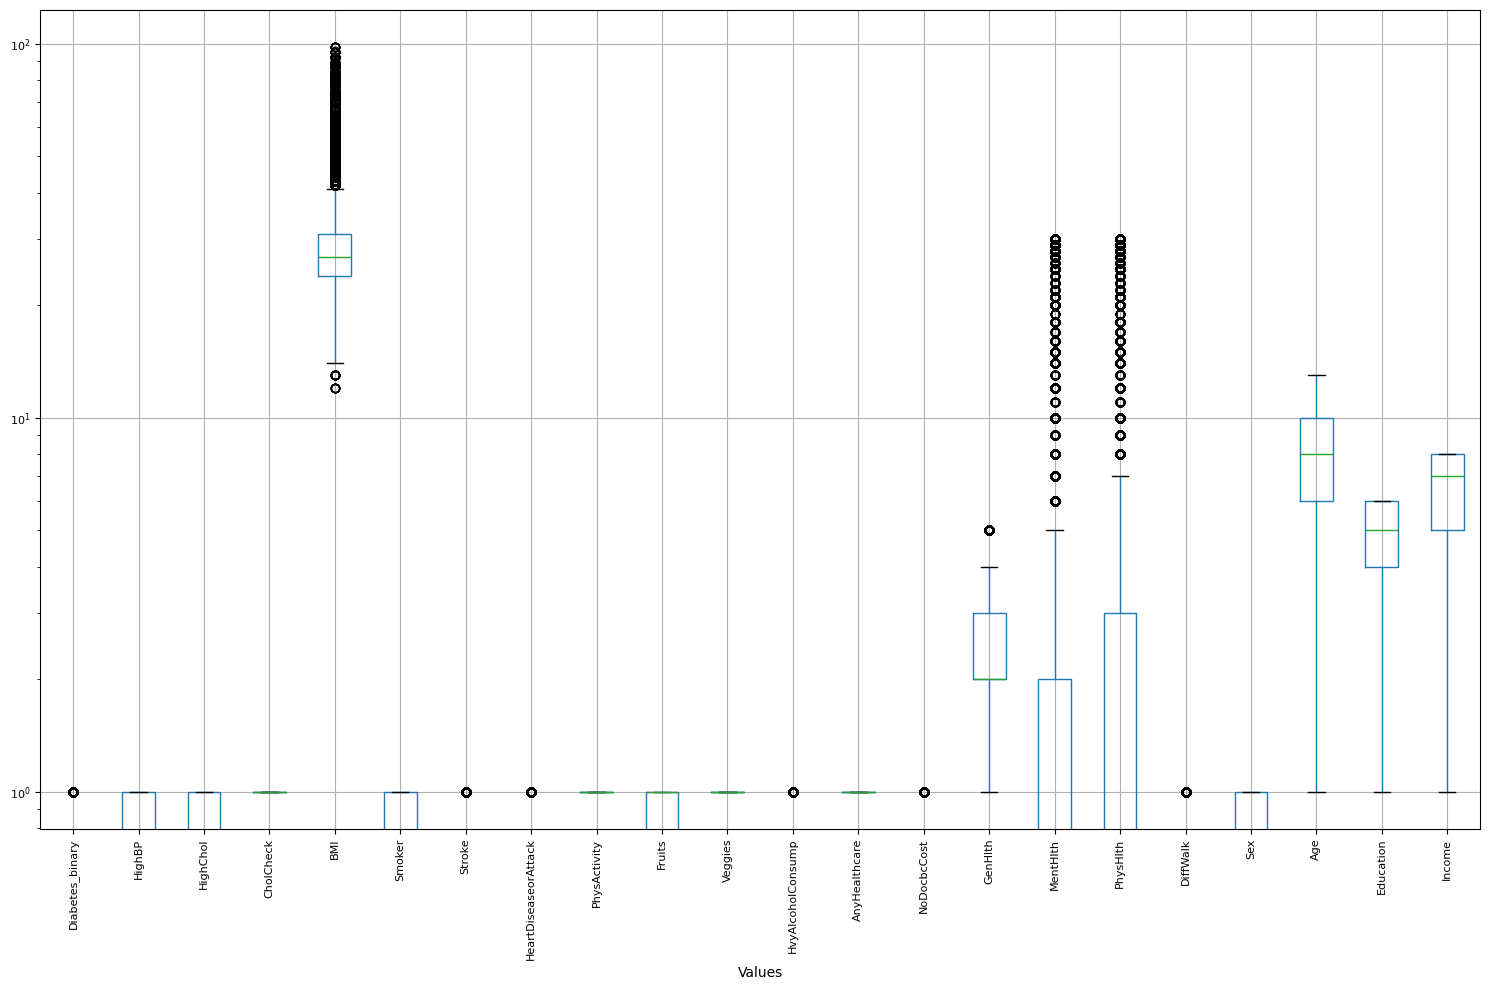

In [6]:
#Boxplot
plt.subplots(figsize=(15, 10))
dataset.boxplot(fontsize=8)
plt.xticks(rotation=90)
plt.xlabel('Values')
plt.yscale('log')
plt.tight_layout()
plt.show()


In [ ]:
#Scaterplot
sns.relplot(x= 'Age', y= 'BMI', data= dataset, hue='Sex',style='Smoker')


In [ ]:
#Correlation
plt.figure(figsize=(18, 10))
sns.heatmap(dataset.corr(), cmap="coolwarm")

# 3. **Prepare the data.**

* Take care of missing data (if you have not done this already)
* Data cleaning (remove outliers, if necessary).
* Feature engineering (create new features/ delete non relevant ones/ etc. Iterative process)


In [ ]:
#DropNA
dataset.dropna(inplace=True)

In [ ]:
#Remove outliers

#IQR method
def remove_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    return column.where((column >= lower_bound) & (column <= upper_bound))


#dataset['noliersBMI'] = remove_outliers_iqr(dataset['BMI'])

In [ ]:
dataset.columns

In [ ]:
#Random Oversampling
no_diabetes_majority_class = dataset[dataset["Diabetes_binary"] == 0]
diabetes_minority_class = dataset[dataset["Diabetes_binary"] == 1]
#upsample minority
diabetes_minority_class_upsampled = resample(diabetes_minority_class,
                          replace=True, # This has to be set True when upsampling
                          n_samples=len(no_diabetes_majority_class), # match number in majority class
                          random_state=27) # reproducible results

# combine majority and upsampled minority
data_randomOverSampling = pd.concat([no_diabetes_majority_class, diabetes_minority_class_upsampled])


#Plotting
x = data_randomOverSampling['Diabetes_binary'].value_counts().values
labels = data_randomOverSampling['Diabetes_binary'].value_counts().index

# Define a color palette
palette = sns.color_palette("Blues_r", len(labels))

# Create the barplot 
plt.figure(figsize=(8, 6))
sns.barplot(x=labels, y=x, palette=palette)

# Add titles and labels with font customizations
plt.title('Frequency Table of the Label: Upsampled (Random Oversampling)', fontsize=16, fontweight='bold', color='navy')
plt.xlabel('Binary', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Add value annotations on top of the bars
for i in range(len(x)):
    plt.text(i, x[i] + 200, str(x[i]), ha='center', fontsize=10, color='black')

# Customize grid and aesthetics
sns.despine(top=True, right=True, left=False, bottom=False)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

print('Total number of labels: ', x)

In [ ]:
#grupby age sex diabetes
grouped_data = dataset.groupby(['Age', 'Sex'])['Diabetes_binary'].sum().reset_index()

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
sns.barplot(x='Age', y='Diabetes_binary', hue='Sex', data=grouped_data, ci=None)

plt.title('Casos de Diabetes por Edad y Sexo')
plt.xlabel('Edad')
plt.ylabel('Suma de Diabetes')

plt.show()


# 4. Divide data into ``train/ test`` or ``train/validation/test`` datasets

* Transformation (scale your data, if needed). 

In [ ]:
# Train/validation/test split
from sklearn.model_selection import train_test_split

# Eliminar valores nulos
dataset.dropna(inplace=True)

# Separar características (X) y la variable objetivo (y)
X = dataset.drop(['Diabetes_binary'], axis=1)  # Todas las características
y = dataset['Diabetes_binary']  # Solo la columna objetivo

test_size = 0.2  
validation_size = 0.2 
random_state = 10 

#entrenamiento+validación y prueba
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=test_size, random_state=random_state, shuffle=True
)
#entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=validation_size, random_state=random_state, shuffle=True
)



# 5. Models building and comparison

* Select the correct evaluation metric or metrics (https://scikit-learn.org/stable/modules/model_evaluation.html)
* Remember to always use the same random_state to be able to repeat results.

In [ ]:
#Models

#Logistic regresion
import warnings
warnings.filterwarnings("ignore")
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred_logreg = log_reg.predict(X_test)
acc_lg =  accuracy_score(y_test, y_pred_logreg)

# Evaluation
print("Logistic Regression Accuracy: ", acc_lg)



#SVM
from sklearn.svm import SVC

# SVC
svc = SVC(kernel = 'linear', random_state=42, shrinking =True, verbose=True, tol=0.1, max_iter=100)
svc.fit(X_train, y_train)

# Predictions
y_pred_svc = svc.predict(X_test)
acc_svc = accuracy_score(y_test, y_pred_svc)
# Evaluation
print("SVC Accuracy: ", acc_svc)




#KNN
from sklearn.neighbors import KNeighborsClassifier

# Convert X_train and X_test to NumPy arrays
X_train_np = X_train.to_numpy()
X_test_np = X_test.to_numpy()

# KNN
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_np, y_train)

# Predictions
y_pred_knn = knn.predict(X_test_np)

acc_knn = accuracy_score(y_test, y_pred_knn)

# Evaluation
print("KNN Accuracy: ", acc_knn)




#Decision Tree & Random Forest
from sklearn.tree import DecisionTreeClassifier

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

# Predictions
y_pred_tree = decision_tree.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_tree)
# Evaluation
print("Decision Tree Accuracy: ", acc_dt)

#Random Forest
from sklearn.ensemble import RandomForestClassifier

# Random Forest
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)

# Predictions
y_pred_forest = random_forest.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_forest)
# Evaluation
print("Random Forest Accuracy: ", acc_rf)

In [ ]:
# Create a DataFrame with the results
accuracy_data = {
    "Model": ["LogisticRegresion", "KNN", "Decision Tree", "Random Forest", "SVM"],
    "Accuracy": [acc_lg, acc_knn, acc_dt, acc_rf, acc_svc]
}

accuracy_df = pd.DataFrame(accuracy_data)  # Seaborn library expects a dataframe as input
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False)

# Plotting using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x="Model", y="Accuracy", data=accuracy_df, palette="Blues_d")
plt.title('Accuracy Comparison of Different Classification Models')
plt.xlabel('Classification Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Ensure the y-axis goes from 0 to 1 for better visualization
plt.show()

* Which model(s) obtains better result(s)?


In [ ]:
#Cros validation all models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

num_folds = 50 #aixo es el tema de cros validation
error_metrics = {'balanced_accuracy'}
models = {('LR', LogisticRegression()),
            ('SVM', SVC()),
            ('KNN', KNeighborsClassifier()),
            ('DT', DecisionTreeClassifier()),
            ('RF', RandomForestClassifier())}

results = [] # stores the results of the evaluation metrics
names = [] # name of each algorithm
msg = [] # print the summary of the cross-validation method

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit

# Entreno con validación cruzada
for scoring in error_metrics:
    print('Classification evaluation metric: ', scoring)
    for name, model in models:
        print('Model ', name)
        cross_validation = StratifiedShuffleSplit(n_splits=num_folds, random_state=0)
        cv_results = cross_val_score(model, X_train, y_train, cv=cross_validation, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        resume = (name, cv_results.mean(), cv_results.std())
        msg.append(resume)
    print(msg)

    # Comparar resultados entre algoritmos
    fig = plt.figure()
    fig.suptitle('Comparison of algorithms with evaluation metrics: %s' %scoring)
    ax = fig.add_subplot(111)
    ax.set_xlabel('Candidate models')
    ax.set_ylabel('%s' %scoring)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

    results = []

# 6. Adjust hyperparameters.

Steps to perform the hyperadjustment of the parameters in the best model or models selected from step 5):

* Select the Evaluation Metrics
* Define search hyperparameter ranges: model params


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import make_scorer, accuracy_score

# Modelo base
model = LogisticRegression(max_iter=1000)

# Definir el espacio de parámetros para GridSearchCV
grid_space = {
    'penalty': ['l1', 'l2', 'elasticnet', None],  # Tipos de regularización
    'C': [0.1, 1, 10, 100],  # Inverso de la fuerza de regularización
    'solver': ['lbfgs', 'liblinear', 'saga'],  # Solvers disponibles
    'fit_intercept': [True, False],  # Ajustar o no la intersección
}

# Métrica de evaluación personalizada
scoring = make_scorer(accuracy_score)

# Validación cruzada
cv = KFold(n_splits=5, random_state=0, shuffle=True)

# Configurar y ejecutar GridSearchCV
gsearch = GridSearchCV(estimator=model, param_grid=grid_space, scoring=scoring, cv=cv)
gsearch.fit(X_train, y_train)

# Resultados
print("Best results: %f using the following hyperparameters %s" % (gsearch.best_score_, gsearch.best_params_))
means = gsearch.cv_results_['mean_test_score']
stds = gsearch.cv_results_['std_test_score']
params = gsearch.cv_results_['params']

# Imprimir todos los resultados
for mean, std, param in zip(means, stds, params):
    print("Mean Accuracy: %f (std: %f) with: %r" % (mean, std, param))


# **7. Final evaluation of the model**

Train the model with the optimal hyperparameters found in the previous section and make the predictions.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# Crear y configurar el modelo de regresión logística
clf_model = LogisticRegression(
    solver='lbfgs',  # Optimizador (puedes cambiar a 'saga' o 'liblinear' según los datos)
    max_iter=1000,   # Número máximo de iteraciones
    random_state=42  # Semilla para reproducibilidad
)

# Entrenar el modelo
clf_model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_predict = clf_model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy del modelo de regresión logística: {accuracy:.2f}")

# Opcional: Mostrar coeficientes
coefficients = clf_model.coef_
intercept = clf_model.intercept_
print("Coeficientes del modelo:", coefficients)
print("Intercepto del modelo:", intercept)


confusion_matrix = confusion_matrix(y_test, y_predict)
print(classification_report(y_test, y_predict))
print(confusion_matrix)


#### Model results conclusions

# Where the results satisfactory? Repeat the steps if necessary for improving the model

* Retrain the model again trying different approaches: balacing the minority class, adding new input parameters, deleting non relevant input features, trying setting up different hyperparams, etc. 
* Copy and paste below the steps you wish to repeat and run the code from this point onwards (do not delete the code above).